출처 : https://datascienceparichay.com/article/understanding-joins-in-pandas/
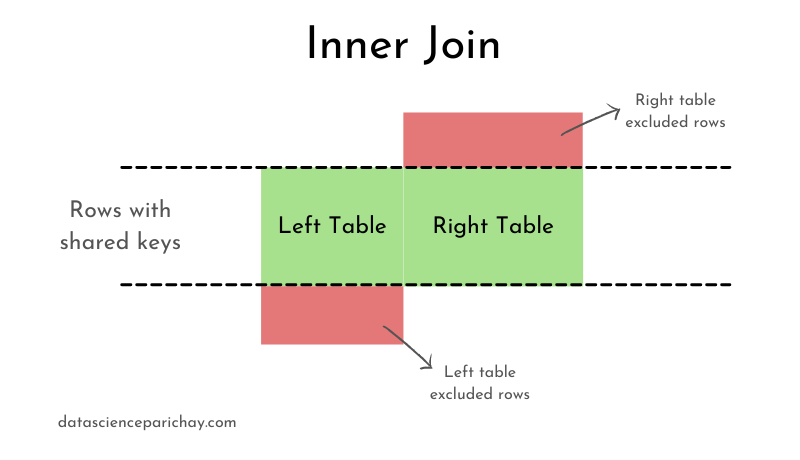

## Inner Join
- 관련 문서 : https://pandas.pydata.org/docs/user_guide/merging.html#brief-primer-on-merge-methods-relational-algebra
- `merge()`메소드를 이용
- 두 개의 DataFrame을 **공통된 인덱스 또는 열**을 기준으로 합치는 방법
- 결과 : 두 DataFrame에 공통된 값만을 가진 행들

## .merge()
- pandas.merge() : https://pandas.pydata.org/docs/reference/api/pandas.merge.html
- DataFrame.merge() : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
- 일반적으로 pandas.merge(), pd.merge()가 쓰인다.


### parameters
#### `left` : DataFrame or named Series
- 왼쪽 DataFrame 객체 지정.

#### `right` : DataFrame or named Series
- 오른쪽 DataFrame 객체 지정.

#### `how` : {‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’
- 조인 방법을 지정

#### `on` : label or list
- 조인할 인덱스 또는 열 지정
- 열 이름 또는 열 이름의 리스트를 전달
- 기본값 : None. 공통된 열 이름을 자동으로 찾음

#### `left_on` , `right_on` : label or list, or array-like
- 왼쪽 DataFrame과 오른쪽 DataFrame에서 조인할 열이름 지정
- 이 인자는 on 인자와 함께 사용되지 않는다.

#### `left_index` , `right_index` : bool, default False
- 인덱스를 기준으로 조인할 때 사용
    - left_index=True : 왼쪽 DataFrame의 인덱스를 사용하여 조인
    - right_index=True : 오른쪽 DataFrame의 인덱스를 사용하여 조인
    
#### `sort`: bool, default False
- True : 조인된 결과를 열 또는 인덱스 기준으로 정렬

#### `suffixes` : list-like, default is (“_x”, “_y”)
- 두 DataFrame에 동일한 이름의 열이 존재할 경우의 처리
- 열에 접미사를 추가하여 구별
- 예시 : `suffixes=('_left', '_right')`로 설정
    - 왼쪽 DataFrame의 열에 '_left' 접미사가 추가
    - 오른쪽 DataFrame의 열에 '_right' 접미사가 추가
    
#### `copy` : bool, default True
- 처리 후 새로운 DataFrame을 반환할지 여부를 지정
    - True : 항상 새로운 DataFrame을 반환
    - False : 기존 DataFrame에 직접 적용

#### `indicator` : bool or str, default False
 - 'left_only', 'right_only', 'both'
 - True : 결과에 _merge라는 열이 추가. 어떤 DataFrame에 파생되는지 표시 

#### `validate` : str, optional
- 조인을 수행하기 전에 데이터 유효성을 확인
- 'one_to_one', 'one_to_many', 'many_to_one', 'many_to_many' : 조인이 해당 유형의 관계를 만족하는지 확인.

## Inner Join 공식문서 예제 1 - 기준이 하나일 때

In [7]:
import pandas as pd

In [8]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [9]:
right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [10]:
pd.merge(left, right, on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [11]:
# 같은 기능을 하도록 DataFrame.merge()를 사용하면
left.merge(right, on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


## Inner Join 공식문서 예제 2 - 기준이 여러 개일 때

In [12]:
left = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [13]:
right = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [14]:
pd.merge(left, right, on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


## Inner Join 본 실습
- [모의투자A.csv](https://docs.google.com/spreadsheets/d/1VvM5stKGM-wqbnFLL6IBJ3ISsoiHQE1dgvdi_24wBcs/edit?usp=sharing)
- [모의투자B.csv](https://docs.google.com/spreadsheets/d/1QzOT3z9L2yruo4wIlfKR_CVmpEW9324YyPNB_35w3BM/edit?usp=sharing)
- [모의투자B1.csv](https://docs.google.com/spreadsheets/d/1ZbaJy0XhY7jzRRYbU-iO9Y60T_pHFlOsW8Y5r9d0MgY/edit?usp=sharing)
    - 모의투자B.csv와 값은 같은데, 열 이름이 '참가ID' -> '참가번호', '참가자'-> '이름'

In [15]:
import pandas as pd

In [16]:
cols = ['참가ID', '참가자', '투자이익']

In [17]:
left = pd.read_csv('모의투자A.csv', usecols=cols)
right = pd.read_csv('모의투자B.csv', usecols=cols)

In [18]:
left

,참가ID,참가자,투자이익
0,A104798,스펜서,50000
1,A204795,김멍멍,60000
2,A375562,박냐옹,55000
3,A408833,홍꿀꿀,70000
4,A523451,감꽥꽦,48000
5,A623415,이냐옹,-53000
6,A742034,강음매,-62000


In [19]:
right

,참가ID,참가자,투자이익
0,A104798,스펜서,-70000
1,A204795,김멍멍,30000
2,A368342,한까악,30000
3,A408833,홍꿀꿀,70000
4,A542890,나구구,20000
5,A617483,장윙윙,10000
6,A732104,류어흥,35000
7,A910752,문부엉,-40000
8,A963547,마개굴,-15000


In [21]:
# inner join
pd.merge(left, right, on='참가ID')

,참가ID,참가자_x,투자이익_x,참가자_y,투자이익_y
0,A104798,스펜서,50000,스펜서,-70000
1,A204795,김멍멍,60000,김멍멍,30000
2,A408833,홍꿀꿀,70000,홍꿀꿀,70000


In [22]:
# on을 생략하면 공통된 열 이름을 자동으로 찾음, how를 생략하면 inner
pd.merge(left, right)

,참가ID,참가자,투자이익
0,A408833,홍꿀꿀,70000


'홍꿀꿀'씨의 각 대회 투자이익이 같아서 스펜서와 김멍멍씨는 조회되지 않는다.
on을 통해 명확하게 열을 지정해줘야한다.

In [23]:
pd.merge(left, right, on=['참가ID', '참가자'])

,참가ID,참가자,투자이익_x,투자이익_y
0,A104798,스펜서,50000,-70000
1,A204795,김멍멍,60000,30000
2,A408833,홍꿀꿀,70000,70000


In [24]:
# indicator=True를 넣으면 어떤 DataFrame에서 파생되는지 표기
pd.merge(left, right, on=['참가ID', '참가자'], indicator=True)

,참가ID,참가자,투자이익_x,투자이익_y,_merge
0,A104798,스펜서,50000,-70000,both
1,A204795,김멍멍,60000,30000,both
2,A408833,홍꿀꿀,70000,70000,both


innerjoin이기 때문에 공통값이기 때문에 both

## 열 이름이 다르다면?
- [모의투자A.csv](https://docs.google.com/spreadsheets/d/1VvM5stKGM-wqbnFLL6IBJ3ISsoiHQE1dgvdi_24wBcs/edit?usp=sharing)
- [모의투자B1.csv](https://docs.google.com/spreadsheets/d/1ZbaJy0XhY7jzRRYbU-iO9Y60T_pHFlOsW8Y5r9d0MgY/edit?usp=sharing)
    - 모의투자B.csv와 값은 같은데, 열 이름이 '참가ID' -> '참가번호', '참가자'-> '이름'

In [25]:
import pandas as pd

In [26]:
cols1 = ['참가ID', '참가자', '투자이익']
cols2 = ['참가번호', '이름', '투자이익']

In [27]:
left = pd.read_csv('모의투자A.csv', usecols=cols1)
right = pd.read_csv('모의투자B1.csv', usecols=cols2)

In [28]:
left

,참가ID,참가자,투자이익
0,A104798,스펜서,50000
1,A204795,김멍멍,60000
2,A375562,박냐옹,55000
3,A408833,홍꿀꿀,70000
4,A523451,감꽥꽦,48000
5,A623415,이냐옹,-53000
6,A742034,강음매,-62000


In [29]:
right

,참가번호,이름,투자이익
0,A104798,스펜서,-70000
1,A204795,김멍멍,30000
2,A368342,한까악,30000
3,A408833,홍꿀꿀,70000
4,A542890,나구구,20000
5,A617483,장윙윙,10000
6,A732104,류어흥,35000
7,A910752,문부엉,-40000
8,A963547,마개굴,-15000


```python
pd.merge(left, right, how='inner', on=???)
```  
- 참가id? 참가번호?
- 참가자? 이름?

In [31]:
pd.merge(left, right, left_on='참가ID', right_on='참가번호', suffixes=['_A', '_B'])

,참가ID,참가자,투자이익_A,참가번호,이름,투자이익_B
0,A104798,스펜서,50000,A104798,스펜서,-70000
1,A204795,김멍멍,60000,A204795,김멍멍,30000
2,A408833,홍꿀꿀,70000,A408833,홍꿀꿀,70000


In [32]:
pd.merge(left, right, left_on=['참가ID', '참가자'], right_on=['참가번호', '이름'], suffixes=['_A', '_B'])

,참가ID,참가자,투자이익_A,참가번호,이름,투자이익_B
0,A104798,스펜서,50000,A104798,스펜서,-70000
1,A204795,김멍멍,60000,A204795,김멍멍,30000
2,A408833,홍꿀꿀,70000,A408833,홍꿀꿀,70000


In [33]:
# 굳이 참가번호와 이름을 남길 필요는 없을 듯 하다.
result = pd.merge(left, right, left_on=['참가ID', '참가자'], right_on=['참가번호', '이름'], suffixes=['_A', '_B'])

In [34]:
# 열 선택 또는 drop을 하자
result[['참가ID', '참가자', '투자이익_A', '투자이익_B']]

,참가ID,참가자,투자이익_A,투자이익_B
0,A104798,스펜서,50000,-70000
1,A204795,김멍멍,60000,30000
2,A408833,홍꿀꿀,70000,70000


In [35]:
result.drop(['참가번호', '이름'], axis=1)

,참가ID,참가자,투자이익_A,투자이익_B
0,A104798,스펜서,50000,-70000
1,A204795,김멍멍,60000,30000
2,A408833,홍꿀꿀,70000,70000


In [36]:
# 체인형 프로그래밍으로 drop도 이어본다면
pd.merge(left, right, 
         left_on=['참가ID', '참가자'], right_on=['참가번호', '이름'], 
         suffixes=['_A', '_B']).drop(['참가번호', '이름'], axis=1)

,참가ID,참가자,투자이익_A,투자이익_B
0,A104798,스펜서,50000,-70000
1,A204795,김멍멍,60000,30000
2,A408833,홍꿀꿀,70000,70000
